In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

df = pd.read_csv("data/health_study_dataset.csv")

# df.head(3)
# df.info()


# Beskrivande analys

In [3]:
columns = ["age", "weight", "height", "systolic_bp", "cholesterol",]

stats = df[columns].agg(["mean", "median", "min", "max"])

print(stats)

             age   weight     height  systolic_bp  cholesterol
mean    49.42625   73.413  171.84925   149.178625      4.92915
median  50.00000   73.200  171.35000   149.400000      4.97000
min     18.00000   33.700  144.40000   106.800000      2.50000
max     90.00000  114.400  200.40000   185.900000      7.88000


# Grafer

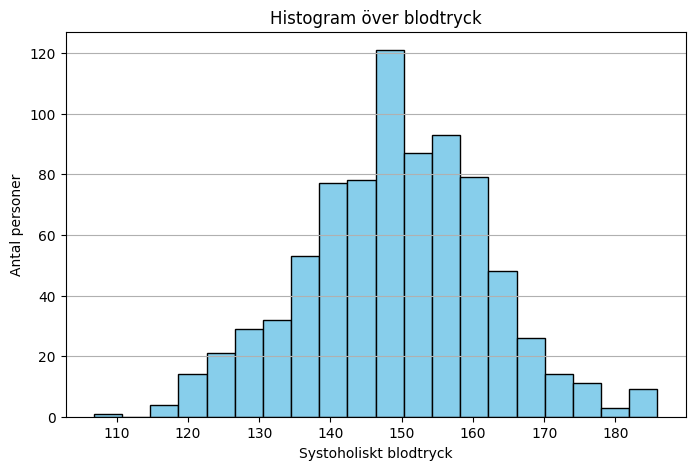

In [4]:
# Histogram över blodtryck

plt.figure(figsize = (8,5))
plt.hist(df["systolic_bp"],bins = 20, color = "skyblue", edgecolor = "black")
plt.title("Histogram över blodtryck")
plt.xlabel("Systoholiskt blodtryck")
plt.ylabel("Antal personer")
plt.grid(axis = "y")
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

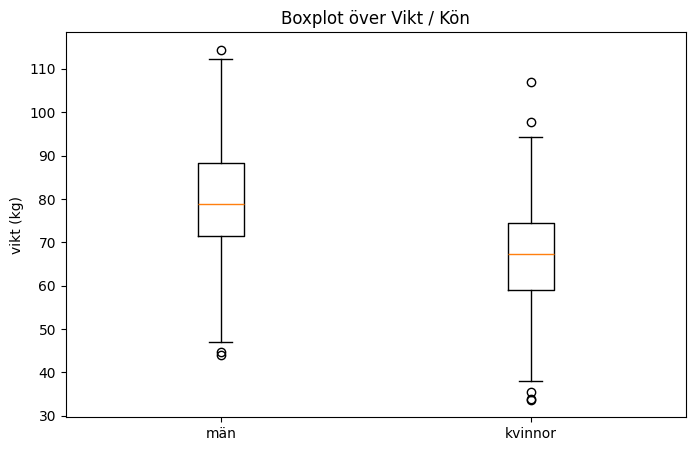

In [10]:
# Boxplot vikt/kön

male_weight = df[df["sex"] == "M"]["weight"]
female_weight = df[df["sex"] == "F"]["weight"]
plt.figure(figsize = (8,5))
plt.boxplot([male_weight,female_weight], tick_labels = ["män", "kvinnor"]), 
plt.title("Boxplot över Vikt / Kön")
plt.ylabel("vikt (kg)")
plt.show




<function matplotlib.pyplot.show(close=None, block=None)>

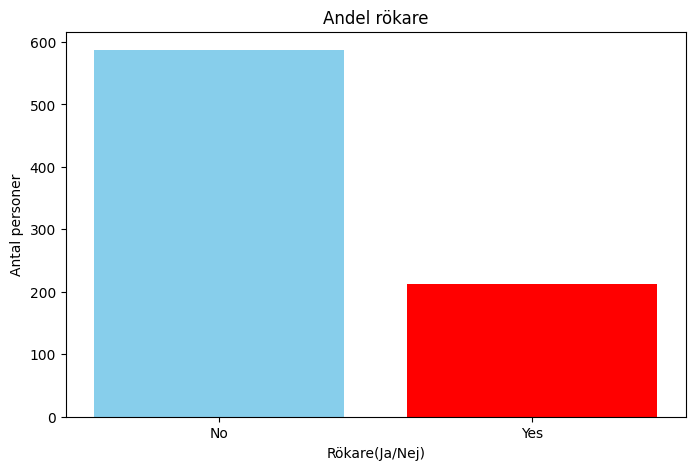

In [6]:
# stapeldiagram över andelen rökare

smoker_counts = df["smoker"].value_counts()
plt.figure(figsize = (8,5))
plt.bar(smoker_counts.index, smoker_counts.values, color = ["skyblue", "red"])
plt.title("Andel rökare")
plt.xlabel("Rökare(Ja/Nej)")
plt.ylabel("Antal personer")
plt.show

# Simulering kopplad till caset

In [7]:
# andel personer med sjukdom 

disease_proportion = df["disease"].mean()
print (f"Andel personer med sjukdom: {disease_proportion:.2f}")

# simulera 1000 pers

simulated_disease = np.random.binomial(1, disease_proportion, 1000)
simulated_proportion = simulated_disease.mean()
print(f"Simulerad andel sjukdom: {simulated_proportion:.2f}")








Andel personer med sjukdom: 0.06
Simulerad andel sjukdom: 0.06


# Konfidensintervall

In [8]:
# konfidensintervall för medelvärdet av systolisk blodtryck

n_iterations = 1000
bootstrap_means = []

for _ in range(n_iterations):
    sample = np.random.choice(df["systolic_bp"], size = len(df), replace = True)
    bootstrap_means.append(sample.mean())

ci_lower = np.percentile(bootstrap_means, 2.5)
ci_upper = np.percentile(bootstrap_means, 97.5)
print(f"95% bootstrap-konfidensintervall för medelvärde blodtryck: ({ci_lower:.2f}, {ci_upper:.2f})")


95% bootstrap-konfidensintervall för medelvärde blodtryck: (148.32, 150.09)


# Hypotesprövning

In [9]:
# hypotesprövning rökare vs icke rökare
blood_pressure_smokers = df[df["smoker"] == "Yes"]["systolic_bp"].values
blood_pressure_non_smokers = df[df["smoker"] == "No"]["systolic_bp"].values

n_iterations = 10000
diff_means = []

for _ in range(n_iterations):
    sample_smokers = np.random.choice(blood_pressure_smokers, size = len(blood_pressure_smokers), replace = True)
    sample_non_smokers = np.random.choice(blood_pressure_non_smokers, size = len(blood_pressure_non_smokers), replace = True)
    diff_means.append(sample_smokers.mean() - sample_non_smokers.mean())

diff_means = np.array(diff_means)
p_value = np.mean(diff_means <= 0)
print(f"P-värde: {p_value:.3f}")


P-värde: 0.322


# Resultat 

- Eftersom P-värdet = 0.322 är ganska högt 
- så tyder detatt blodtrycket mellan rökare och icke-rökare skiljer mycket,
 och evenutella skillnader kan vara en slump.



